## Sierraleone 

## Step 1: data Importing

In [13]:
import sys
sys.path.append('..')  # This adds the parent directory to the Python path
# notebooks/benin_analysis.ipynb

from scripts.data_loading import load_data, initial_exploration

# Load the data for Benin
sierraleone_data = load_data('../src/sierraleone-bumbuna.csv')

# Initial exploration
initial_exploration(sierraleone_data)

First 5 rows of the data:
             Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0 2021-10-30 00:01:00 -0.7 -0.1 -0.8   0.0   0.0  21.9  99.1  0.0     0.0   
1 2021-10-30 00:02:00 -0.7 -0.1 -0.8   0.0   0.0  21.9  99.2  0.0     0.0   
2 2021-10-30 00:03:00 -0.7 -0.1 -0.8   0.0   0.0  21.9  99.2  0.0     0.0   
3 2021-10-30 00:04:00 -0.7  0.0 -0.8   0.0   0.0  21.9  99.3  0.0     0.0   
4 2021-10-30 00:05:00 -0.7 -0.1 -0.8   0.0   0.0  21.9  99.3  0.0     0.0   

   WSstdev   WD  WDstdev    BP  Cleaning  Precipitation  TModA  TModB  \
0      0.0  0.0      0.0  1002         0            0.0   22.3   22.6   
1      0.0  0.0      0.0  1002         0            0.0   22.3   22.6   
2      0.0  0.0      0.0  1002         0            0.0   22.3   22.6   
3      0.0  0.0      0.0  1002         0            0.1   22.3   22.6   
4      0.0  0.0      0.0  1002         0            0.0   22.3   22.6   

   Comments  
0       NaN  
1       NaN  
2       NaN  
3       NaN  
4

## Step 2: Data quailty Check

In [14]:
# notebooks/benin_analysis.ipynb

from scripts.data_quality import check_missing_values, check_duplicates, check_outliers, validate_data_types, calculate_summary_statistics

# Load the data for Benin
sierraleone_data = load_data('../src/sierraleone-bumbuna.csv')

# Check for missing values
missing_values = check_missing_values(sierraleone_data)
print("Missing Values:\n", missing_values)

# Check for duplicates
duplicates = check_duplicates(sierraleone_data)
print(f"Number of Duplicate Rows: {duplicates}")

# Check for outliers
outliers = check_outliers(sierraleone_data)
print("Outliers:\n", outliers)

# Validate data types
data_types = validate_data_types(sierraleone_data)
print("Data Types:\n", data_types)

# Calculate summary statistics
summary_stats = calculate_summary_statistics(sierraleone_data)
print("Summary Statistics:\n", summary_stats)

Missing Values:
 Comments    525600
dtype: int64
Number of Duplicate Rows: 0
Outliers:
 {'GHI': {'lower_bound': np.float64(-12.8), 'upper_bound': np.float64(1025.0), 'outlier_count': 10120}, 'DNI': {'lower_bound': np.float64(-0.8), 'upper_bound': np.float64(795.3), 'outlier_count': 9221}, 'DHI': {'lower_bound': np.float64(-12.9), 'upper_bound': np.float64(556.9), 'outlier_count': 10160}, 'ModA': {'lower_bound': np.float64(0.0), 'upper_bound': np.float64(1011.2), 'outlier_count': 5255}, 'ModB': {'lower_bound': np.float64(0.0), 'upper_bound': np.float64(983.0), 'outlier_count': 5248}, 'Tamb': {'lower_bound': np.float64(17.3), 'upper_bound': np.float64(36.5), 'outlier_count': 10317}, 'RH': {'lower_bound': np.float64(18.5), 'upper_bound': np.float64(100.0), 'outlier_count': 5221}, 'WS': {'lower_bound': np.float64(0.0), 'upper_bound': np.float64(4.6), 'outlier_count': 5006}, 'WSgust': {'lower_bound': np.float64(0.0), 'upper_bound': np.float64(6.2), 'outlier_count': 4583}, 'WSstdev': {'lower

## Step 3: Data Cleaning

## 3.1 missing values

In [15]:
# notebooks/benin_analysis.ipynb

from scripts.data_cleaning import handle_missing_values

# Load the data for Benin
sierraleone_data = load_data('../src/sierraleone-bumbuna.csv')

# Handle missing values
sierraleone_data_cleaned = handle_missing_values(sierraleone_data)


sucessfully cleaned


## 3.2 Outlier Treatement

In [16]:
# notebooks/benin_analysis.ipynb

from scripts.data_cleaning import treat_outliers

# Treat outliers
sierraleone_data_cleaned_no_outliers = treat_outliers(sierraleone_data_cleaned)


outliers removed!


## 3.3 Final Data Preparation

In [17]:
# notebooks/benin_analysis.ipynb

from scripts.data_cleaning import final_data_preparation

# Final data preparation
sierraleone_data_final = final_data_preparation(sierraleone_data_cleaned_no_outliers)
if sierraleone_data_final is not None:
    print('Successfully finished step 3: data cleaning')


Successfully finished step 3: data cleaning


## 4 Explatory Data Analysis

4.1 Time Series Analysis

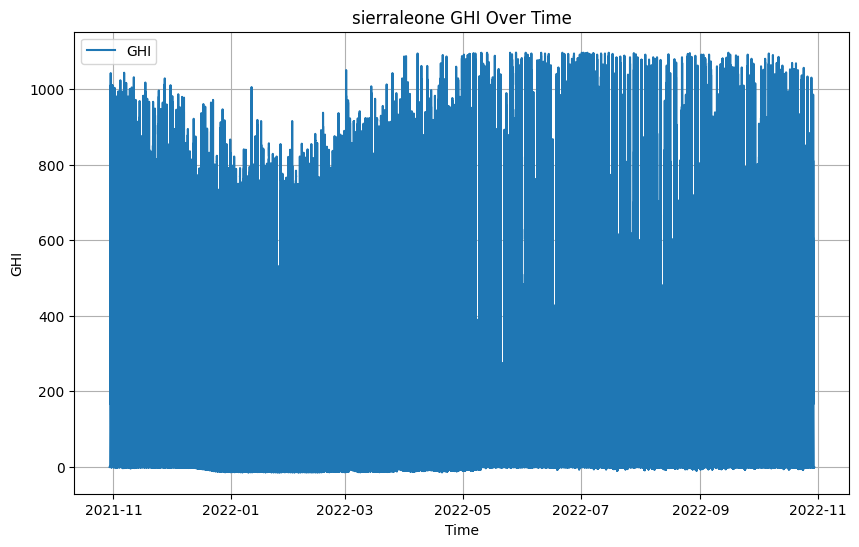

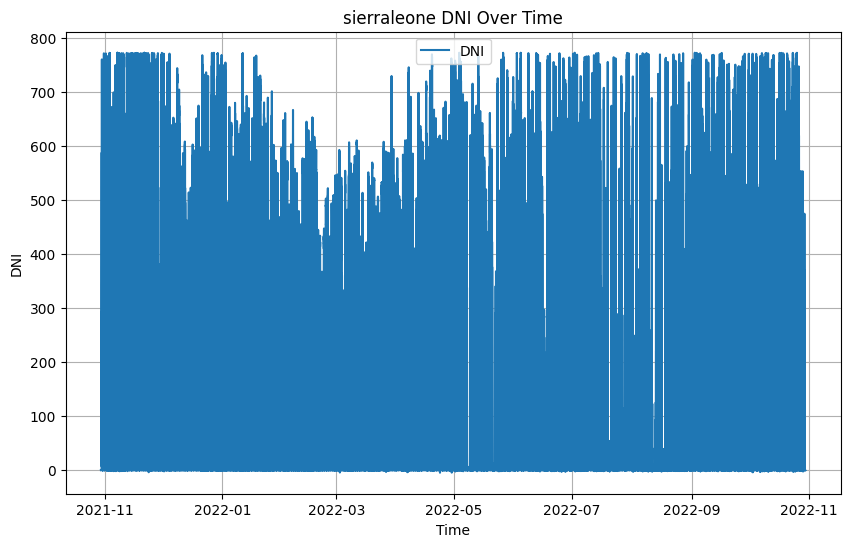

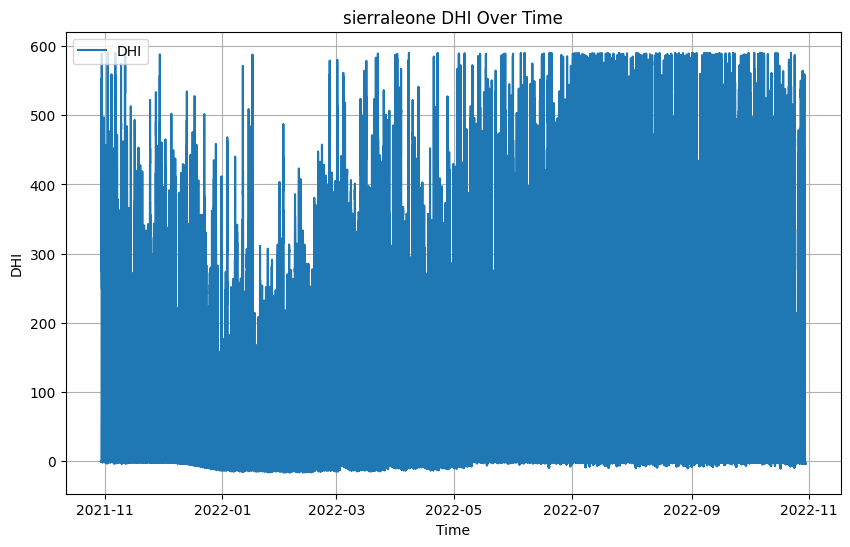

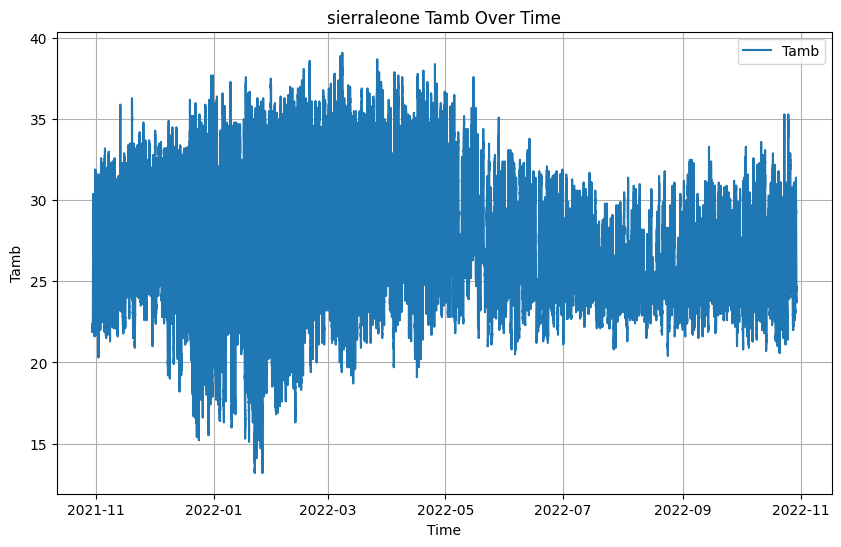

In [18]:
# notebooks/benin_analysis.ipynb

from scripts.eda import plot_time_series

# Plot time series for GHI, DNI, DHI, and Tamb
plot_time_series(sierraleone_data_final, ['GHI', 'DNI', 'DHI', 'Tamb'], title_prefix='sierraleone')


4.2 Correlation Analysis

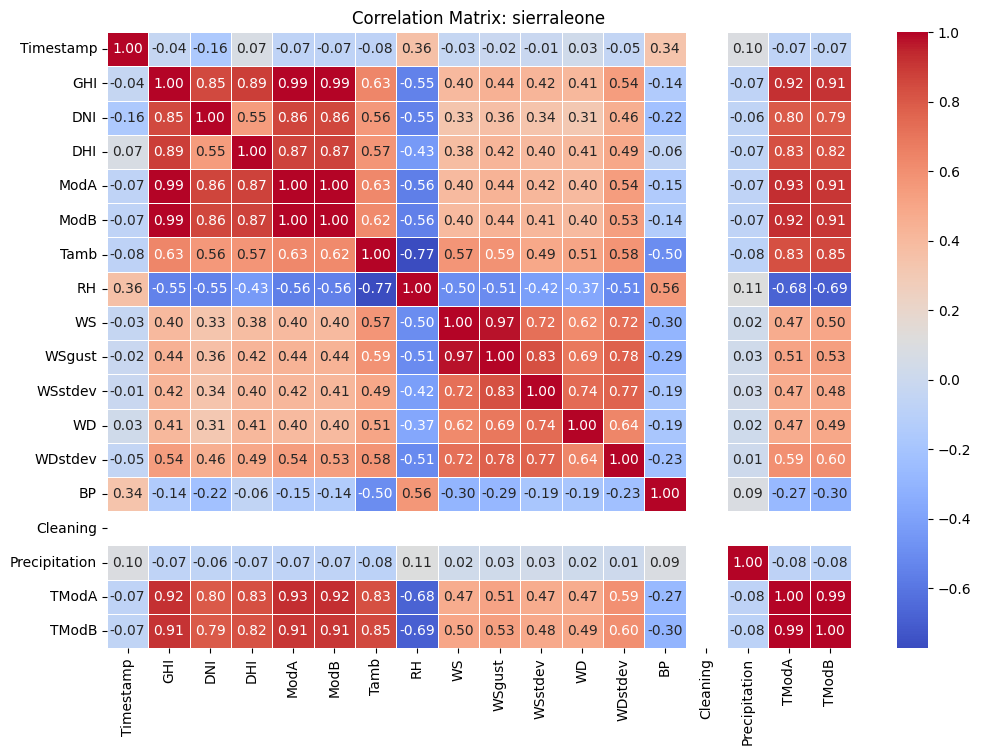

In [19]:
# notebooks/benin_analysis.ipynb

from scripts.eda import plot_correlation_heatmap

# Plot correlation heatmap
plot_correlation_heatmap(sierraleone_data_final, title='sierraleone')


3.4 Temperature and Humidity Analysis

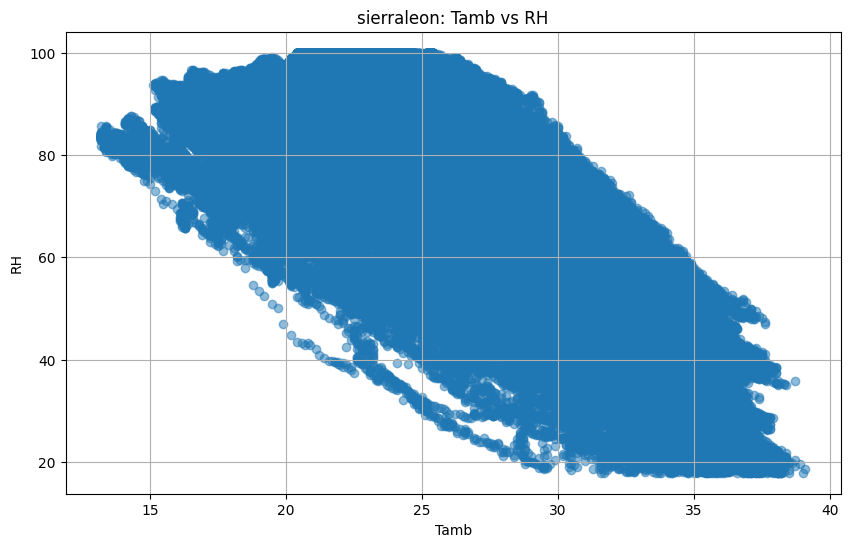

In [20]:
# notebooks/benin_analysis.ipynb

from scripts.eda import plot_scatter

# Plot scatter for temperature and relative humidity
plot_scatter(sierraleone_data_final, x_col='Tamb', y_col='RH', title='sierraleon')


4.5 Histogram

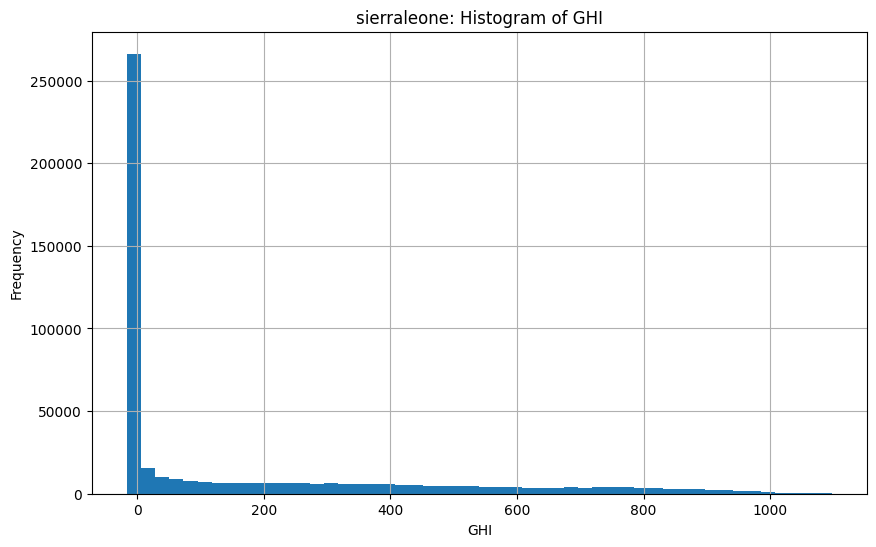

In [21]:
# notebooks/benin_analysis.ipynb

from scripts.eda import plot_histogram

# Plot histogram for GHI
plot_histogram(sierraleone_data_final, column='GHI', title='sierraleone')


4.6 Bubble chart

In [1]:
# notebooks/benin_analysis.ipynb

from scripts.eda import plot_bubble_chart

# Plot bubble chart for GHI vs Tamb vs WS
plot_bubble_chart(sierraleone_data_final, x_col='GHI', y_col='Tamb', size_col='RH', title='Benin')


ModuleNotFoundError: No module named 'scripts.eda'